In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Equation du point fixe

Dans ce TP, nous allons résoudre l'équation du point fixe en utilisant la méthode de newton.
$$x = g(x)$$

Nous allons ensuite comparer les résultats avec la méthode simple
$$x_{t+1} = g(x_t)\,.$$

Nous allons considérer 2 fonctions : 
$$g(x) = log(1+x)$$ 
et
$$g(x) = log(2+x)$$ 

Le but final est de tracer les différentes courbes de convergence et comparer les résultats.

## Plot $g$

Let us see how the two functions look over an interval $[0,2]$.

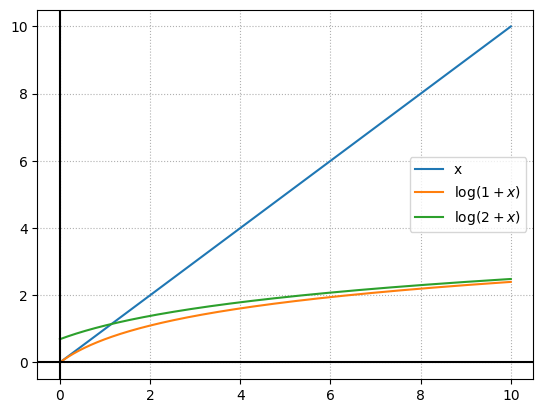

In [3]:
x = np.arange(0, 10, 0.0001)
y1 = np.log(1 + x)
y2 = np.log(2 + x)
fig = plt.figure()
plt.plot(x, x, label='x')
plt.plot(x, y1, label='$\log(1 + x)$')
plt.plot(x, y2, label='$\log(2 + x)$')
plt.grid(linestyle=':')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()
plt.show()

In [4]:
def fixed_point_newton(initial_x, max_iters, objective, objective_grad):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
       
        grad = x - obj
        hessian = 1 - objective_grad(x)
        x = x - grad/hessian
        
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

def fixed_point(initial_x, max_iters, objective):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        # update x 
        x = obj
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

# Implémentation

In [10]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 100

# Run fixed point.
errors_func1, xs_func1 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x)
)
# Run newton
errors_func1_newton, xs_func1_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(1 + x), 
    lambda x: 1./(1. + x)
)


Fixed point: iteration =0, x = 4.62e+00, error=9.54e+01
Fixed point: iteration =10, x = 2.11e-01, error=2.38e-02
Fixed point: iteration =20, x = 1.04e-01, error=5.58e-03
Fixed point: iteration =30, x = 6.87e-02, error=2.41e-03
Fixed point: iteration =40, x = 5.12e-02, error=1.34e-03
Fixed point: iteration =50, x = 4.09e-02, error=8.46e-04
Fixed point: iteration =60, x = 3.40e-02, error=5.83e-04
Fixed point: iteration =70, x = 2.91e-02, error=4.26e-04
Fixed point: iteration =80, x = 2.54e-02, error=3.25e-04
Fixed point: iteration =90, x = 2.25e-02, error=2.56e-04
Fixed point: iteration =0, x = 3.66e+00, error=9.54e+01
Fixed point: iteration =10, x = 1.18e-03, error=2.78e-06
Fixed point: iteration =20, x = 1.15e-06, error=2.64e-12
Fixed point: iteration =30, x = -6.14e-09, error=4.67e-19
Fixed point: iteration =40, x = 4.87e-08, error=4.49e-15
Fixed point: iteration =50, x = -5.33e-08, error=9.98e-17
Fixed point: iteration =60, x = 8.43e-09, error=1.66e-17
Fixed point: iteration =70, x =

Run your implementation on the second function

In [11]:
# Define the parameters of the algorithm.
max_iters = 100

# Initialization
initial_x = 100

# Run fixed point.
errors_func2, xs_func2 = fixed_point(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x)
)
# Run newton
errors_func2_newton, xs_func2_newton = fixed_point_newton(
    initial_x, 
    max_iters, 
    lambda x: np.log(2 + x), 
    lambda x: 1./(2. + x)
)


Fixed point: iteration =0, x = 4.62e+00, error=9.54e+01
Fixed point: iteration =10, x = 1.15e+00, error=4.53e-05
Fixed point: iteration =20, x = 1.15e+00, error=4.76e-10
Fixed point: iteration =30, x = 1.15e+00, error=5.11e-15
Fixed point: iteration =40, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =50, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =60, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =70, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =80, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =90, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =0, x = 3.68e+00, error=9.54e+01
Fixed point: iteration =10, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =20, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =30, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =40, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =50, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =60, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =70, x = 1

**Les vitesses de convergence**

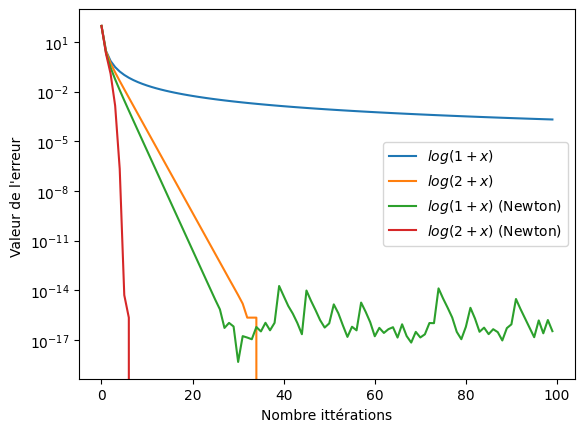

In [12]:
plt.semilogy()
plt.xlabel('Nombre ittérations')
plt.ylabel("Valeur de l'erreur ")
#plt.yscale("log")
plt.plot(range(len(errors_func1)), errors_func1, label='$log(1 + x)$')
plt.plot(range(len(errors_func2)), errors_func2, label='$log(2 + x)$')
plt.plot(range(len(errors_func1_newton)), errors_func1_newton, label='$log(1 + x)$ (Newton)')
plt.plot(range(len(errors_func2_newton)), errors_func2_newton, label='$log(2 + x)$ (Newton)')

plt.legend()
plt.show()

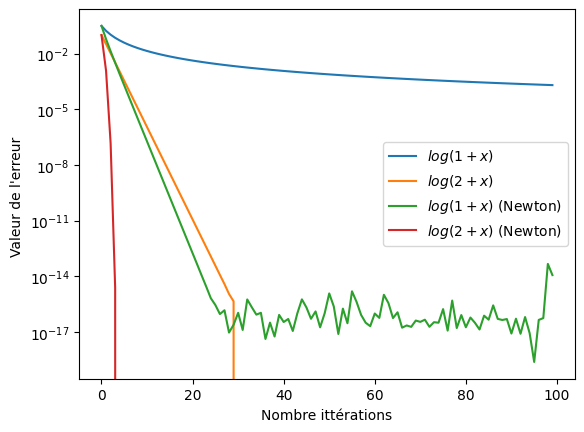

In [8]:
plt.semilogy()
plt.xlabel('Nombre ittérations')
plt.ylabel("Valeur de l'erreur ")
#plt.yscale("log")
plt.plot(range(len(errors_func1)), errors_func1, label='$log(1 + x)$')
plt.plot(range(len(errors_func2)), errors_func2, label='$log(2 + x)$')
plt.plot(range(len(errors_func1_newton)), errors_func1_newton, label='$log(1 + x)$ (Newton)')
plt.plot(range(len(errors_func2_newton)), errors_func2_newton, label='$log(2 + x)$ (Newton)')

plt.legend()
plt.show()

Qu'est ce que vous observez ? Pourriez-vous expliquer la convergence des 2 méthodes ?
